# Trabalho Mineração de Dados - Previsão de Diabetes
## Problema
A diabetes é uma doença crônica que ocorre quando o corpo não consegue regular
adequadamente os níveis de açúcar no sangue. Isso pode ser devido à produção
insuficiente de insulina (um hormônio que regula a glicose no sangue) ou à
incapacidade do corpo de usar a insulina efetivamente.

A diabetes é um problema sério de saúde
porque pode levar a complicações graves,
como danos ao coração, artérias, olhos,
rins e nervos. Em casos extremos, pode até
levar à morte. Portanto, é crucial entender e
gerenciar essa condição para manter uma
vida saudável.

## Objetivo
Portanto, o objetivo do projeto é criar modelos de predição usando Machine Learning
para prever se um paciente, de acordo com suas características, tende a ter diabetes
ou não, além de descobrir quais características que mais contribuem e influenciam
uma pessoa a ter diabetes. Com isso, os hospitais poderão implementar esses
modelos em seus sistemas para identificar precocemente os pacientes em risco de
desenvolver diabetes.

## Sobre a base de dados
O conjunto de dados de previsão de diabetes consiste em uma coleta de informações médicas e demográficas de pacientes, juntamente com o status de diabetes (positivo ou negativo) de cada um. Os dados englobam características como idade, gênero, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue. Essas informações podem ser utilizadas para construir modelos de aprendizado de máquina para prever a diabetes em pacientes com base em seu histórico médico e informações demográficas, auxiliando profissionais de saúde a identificar indivíduos que possam estar em risco de desenvolver a doença e elaborar planos de tratamento personalizados. Além disso, o conjunto de dados pode ser empregado por pesquisadores para investigar as relações entre diferentes fatores médicos e demográficos e a probabilidade de desenvolvimento de diabetes.

O arquivo diabetes_prediction.csv contém dados médicos e demográficos de pacientes, além de seu status de diabetes (positivo ou negativo). Inclui características como idade, gênero, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue. Tais informações podem ser empregadas para desenvolver modelos de aprendizado de máquina para prever a probabilidade de diabetes com base no histórico médico e demográfico dos pacientes.

* **Gênero**: Relacionado ao sexo biológico do indivíduo, que pode influenciar a suscetibilidade à diabetes. As categorias são masculino, feminino e outros.

* **Idade**: Fator relevante, pois a diabetes é mais comumente diagnosticada em adultos mais velhos. A idade varia de 0 a 80 anos no conjunto de dados.

* **Hipertensão**: Condição médica com pressão arterial persistentemente elevada. Valores 0 e 1 indicam a ausência ou presença de hipertensão, respectivamente.

* **Doença Cardíaca**: Associada a um risco aumentado de diabetes. Valores 0 e 1 indicam a ausência ou presença de doença cardíaca, respectivamente.

* **Histórico de Tabagismo**: Considerado um fator de risco para diabetes, com 5 categorias: não atual, ex-fumante, sem informação, atual, nunca e sempre.

* **IMC**: Índice de massa corporal, é a medida da gordura corporal baseada em peso e altura. Valores de IMC mais altos estão ligados a um maior risco de diabetes, sendo a faixa de IMC de 10,16 a 71,55 no dataset.

* **Nível de HbA1c**: Mede a média do nível de açúcar no sangue ao longo de 2-3 meses anteriores. Níveis mais altos, principalmente acima de 6,5%, indicam um maior risco de diabetes.

* **Nível de Glicose no Sangue**: Refere-se à quantidade de glicose no sangue em um dado momento, sendo um indicador-chave de diabetes.

* **Diabetes**: Variável-alvo, com valores de 1 indicando presença de diabetes e 0 indicando a ausência.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv("diabetes_prediction.csv")

display(dados)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Pré-processamento dos dados


Aqui, fizemos o pré-processamento dos dados onde vimos algumas características e informações da base de dados. Aplicamos a técnica do One-Hot Encoding nas colunas de variáveis categóricas para transformá-las em variáveis de valores para poderem ser trabalhadas pelos modelos. A base não possui valores NA.

Aqui exploramos os dados das principais colunas e vimos que:

* A coluna de Idade tem a maior parte entre os 20 e 60 anos, com um pico nos 80 anos.

*  A maior frequência de IMC encontra-se na faixa de 20 a 30, com um pico evidente em torno de 25-30. Há uma queda significativa na frequência conforme o IMC aumenta acima de 30.

* A distribuição do nível de HbA1c mostra uma frequência mais alta entre os valores de 5 e 7. Há uma clara predominância dos valores entre 5.5 e 6.5.

* A maior parte dos dados mostra um nível de glicose no sangue por volta de 100, com um segundo pico maior próximo de 150.

In [ ]:
print(dados.columns)

print(dados.info())

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55046 entries, 0 to 55045
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55046 non-null  object 
 1   age                  55046 non-null  float64
 2   hypertension         55045 non-null  float64
 3   heart_disease        55045 non-null  float64
 4   smoking_history      55045 non-null  object 
 5   bmi                  55045 non-null  float64
 6   HbA1c_level          55045 non-null  float64
 7   blood_glucose_level  55045 non-null  float64
 8   diabetes             55045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB
None


In [ ]:
dados.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
print(dados.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Aplicar One-Hot Encoding nas variáveis categóricas
dados1 = pd.get_dummies(dados, columns=['gender', 'smoking_history'], drop_first=True)

# Visualizar as primeiras linhas do dataset após a codificação
display(dados1.head())
print(dados1.columns)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0


Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')


Distribuição das principais variáveis:

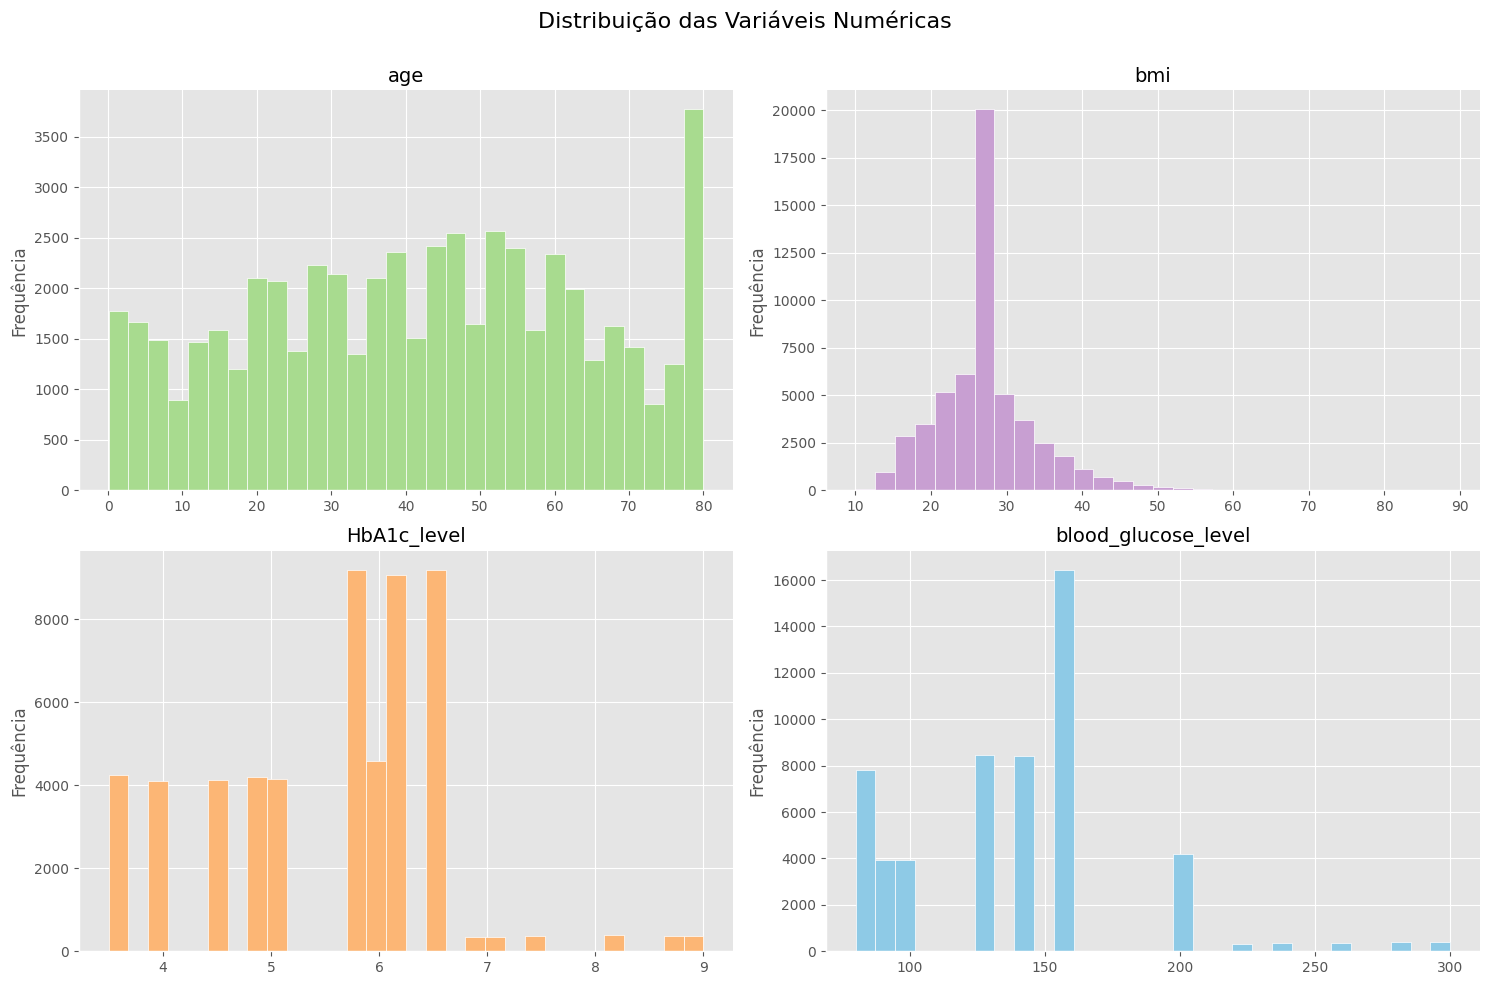

In [ ]:
import matplotlib.pyplot as plt

# Aplicaando o estilo ggplot
plt.style.use('ggplot')

# Variáveis numéricas
colunas_numericas = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cores = ['#a8db8f', '#c89fd2', '#fcb675', '#8ecae6']

# Plotar distribuição das variáveis numéricas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

for i, col in enumerate(colunas_numericas):
    ax = axes[i//2, i%2]
    dados[col].hist(ax=ax, bins=30, color=cores[i], edgecolor='white')
    ax.set_title(col, fontsize=14)
    ax.grid(axis='y', color='white')
    ax.set_xlabel('')
    ax.set_ylabel('Frequência', fontsize=12)
    ax.tick_params(axis='x', rotation=0)

    # Remover bordas superior e direita
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

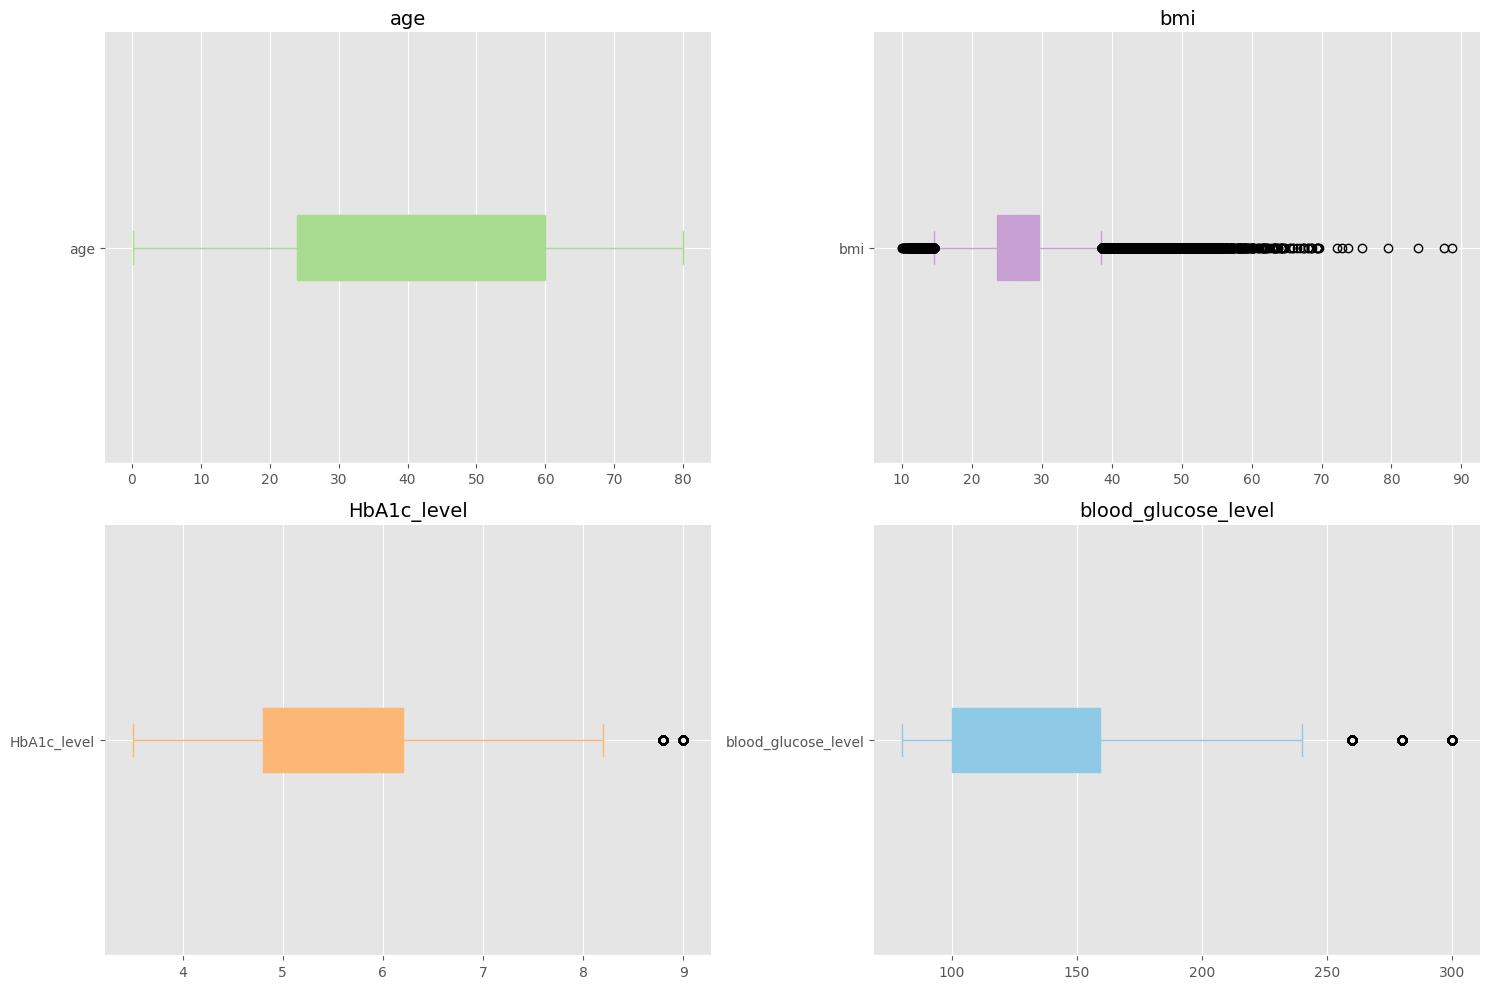

In [ ]:
plt.style.use('ggplot')

cores = ['#a8db8f', '#c89fd2', '#fcb675', '#8ecae6']

# Boxplots para as variáveis contínuas
plt.figure(figsize=(15, 10))

for i, col in enumerate(colunas_numericas, 1):
    ax = plt.subplot(2, 2, i)
    dados[col].plot(kind='box', vert=False, color=cores[i-1], patch_artist=True, ax=ax)
    ax.set_title(col, fontsize=14)
    ax.grid(axis='x', color='white')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


<ipython-input-72-81f5f47a91a3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = dados.corr()


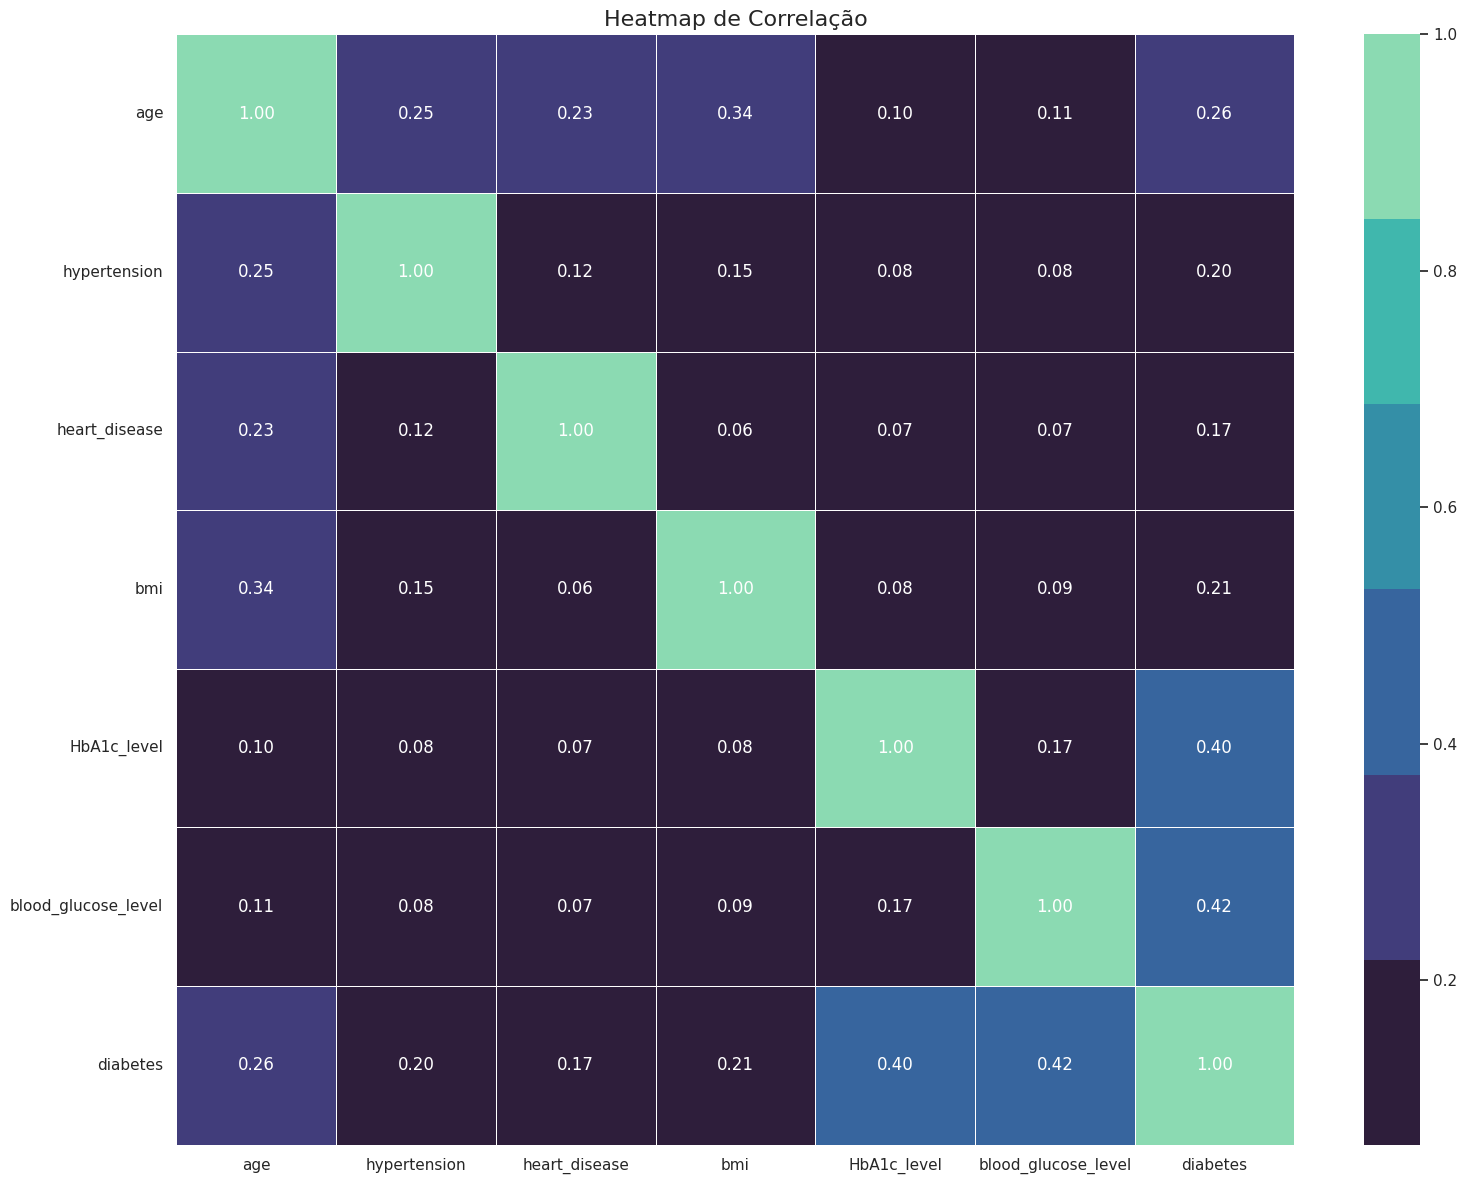

In [ ]:
import seaborn as sns

# Calculando a matriz de correlação
matriz_corr = dados.corr()

# Criando o heatmap de correlação
plt.figure(figsize=(16, 12))

cmap = sns.color_palette("mako")

sns.heatmap(matriz_corr, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f", annot_kws={'size': 12, 'color': 'white'})

plt.title("Heatmap de Correlação", fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalização dos dados

Por conta do intervalo e da escala das variáveis, vamos aplicar a normalização dos dados para garantir que todos os dados tenham o mesmo peso para os modelos. Escolhemos utilizar o Min-Max Scaling, que transforma os dados em um intervalo entre 0 e 1.

In [ ]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

# Colunas a serem normalizadas
colunas_normalizar = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Inicializar o normalizador Min-Max
scaler = MinMaxScaler()

# Aplicar a normalização nas colunas especificadas
dados1[colunas_normalizar] = scaler.fit_transform(dados1[colunas_normalizar])

# Visualizar as primeiras linhas do dataset após a normalização
dados1.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.192860,0.563636,0.272727,0.0,0,0,0,0,0,1,0
1,0.674675,0.0,0.0,0.219921,0.563636,0.000000,0.0,0,0,0,0,0,0,0
2,0.349349,0.0,0.0,0.219921,0.400000,0.354545,0.0,1,0,0,0,0,1,0
3,0.449449,0.0,0.0,0.170753,0.272727,0.340909,0.0,0,0,1,0,0,0,0
4,0.949950,1.0,1.0,0.128700,0.236364,0.340909,0.0,1,0,1,0,0,0,0


# Árvore de Decisão

1. Resumo:

O modelo de Árvore de Decisão foi aplicado para prever a ocorrência de diabetes em pacientes, com base em diversas variáveis clínicas. Com uma precisão geral de aproximadamente 94.9%, o modelo demonstrou ser bem eficaz na classificação correta dos casos.

Além disso, vemos também que o modelo considerou as variáveis de HbA1c, glicose, IMC e Idade como mais importantes.

2. Desempenho do Modelo:

Acurácia Geral: 94.9%
A acurácia é uma medida geral da eficácia do modelo, indicando que cerca de 94.9% das previsões feitas pelo modelo estavam corretas.

Precisão:

Classe 0 (Não-diabetes): 97%
Classe 1 (Diabetes): 70%
A precisão descreve a proporção de previsões verdadeiramente positivas em relação a todas as previsões positivas. Especificamente, o modelo demonstrou alta precisão na identificação de pacientes sem diabetes (97%). No entanto, a precisão foi consideravelmente menor para casos de diabetes (70%), sugerindo uma quantidade maior de falsos positivos para essa classe.

Recall (Sensibilidade):

Classe 0 (Não-diabetes): 97%
Classe 1 (Diabetes): 71%
O recall indica a capacidade do modelo de identificar corretamente todos os casos reais de uma classe. Tanto para pacientes com diabetes quanto para os sem a doença, o modelo identificou aproximadamente 97% e 71%, respectivamente, de todos os casos verdadeiros.

F1-Score:

Classe 0 (Não-diabetes): 97%
Classe 1 (Diabetes): 71%
O F1-Score é a média harmônica entre precisão e recall, fornecendo um balanço entre essas métricas. O modelo manteve um alto F1-Score para a classe sem diabetes e um desempenho razoável para a classe com diabetes.

3. Matriz de Confusão:

A matriz de confusão revelou os seguintes resultados:

Verdadeiros positivos (Diabetes): 677
Falsos positivos (Classificados incorretamente como diabetes): 288
Verdadeiros negativos (Não-diabetes): 9769
Falsos negativos (Classificados incorretamente como não-diabetes): 275

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dados1.dropna(inplace=True)

# Dividir os dados em características (X) e variável alvo (y)
X = dados1.drop('diabetes', axis=1)
y = dados1['diabetes']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinar uma árvore de decisão
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred = arvore.predict(X_teste)

# Avaliar a performance do modelo
acuracia = accuracy_score(y_teste, y_pred)
classification_rep = classification_report(y_teste, y_pred)
confusion_mat = confusion_matrix(y_teste, y_pred)

acuracia, classification_rep, confusion_mat


(0.9488600236170406,
 '              precision    recall  f1-score   support\n\n         0.0       0.97      0.97      0.97     10057\n         1.0       0.70      0.71      0.71       952\n\n    accuracy                           0.95     11009\n   macro avg       0.84      0.84      0.84     11009\nweighted avg       0.95      0.95      0.95     11009\n',
 array([[9769,  288],
        [ 275,  677]]))

94.89% de acurácia

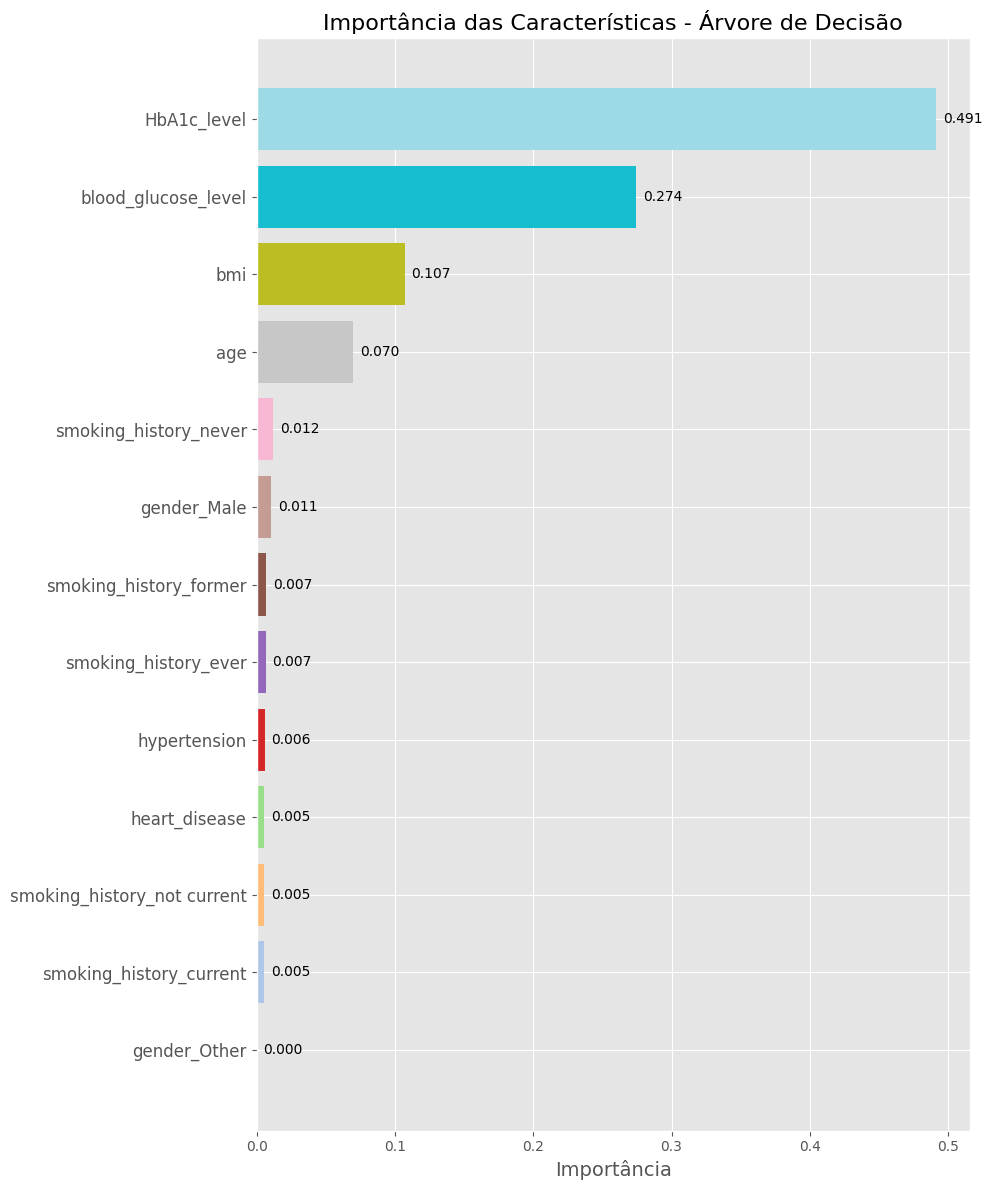

In [ ]:
import matplotlib.cm as cm


# Pegar a importância das características
feature_importance = arvore.feature_importances_

# Ordenar as características pela importância
aux = np.argsort(feature_importance)

# Paleta de cores
colors = cm.tab20(np.linspace(0, 1, X.shape[1]))

# Criar o gráfico
plt.figure(figsize=(10, 12))
bars = plt.barh(range(X.shape[1]), feature_importance[aux], align='center', color=colors)

# Adicionar os rótulos de dados ao lado de cada barra
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}',
             ha='left', va='center', color='black', fontsize=10)

plt.yticks(range(X.shape[1]), X.columns[aux], fontsize=12)
plt.xlabel('Importância', fontsize=14)
plt.title('Importância das Características - Árvore de Decisão', fontsize=16)
plt.tight_layout()
plt.show()

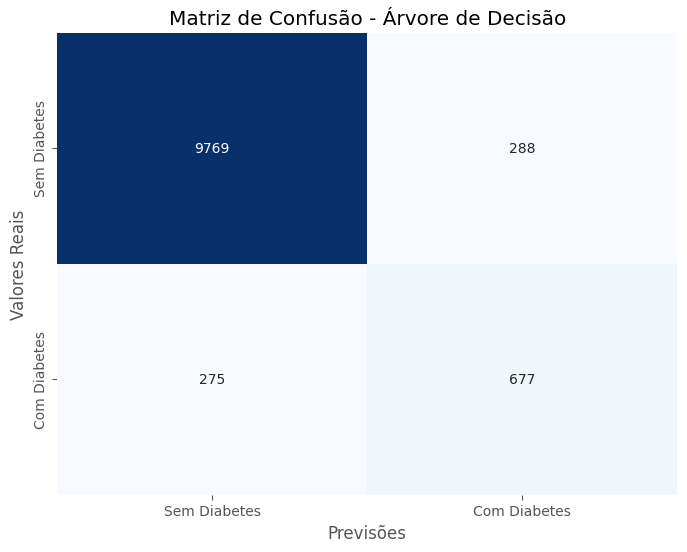

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)

# Criar o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'])
plt.yticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'], va='center')
plt.show()


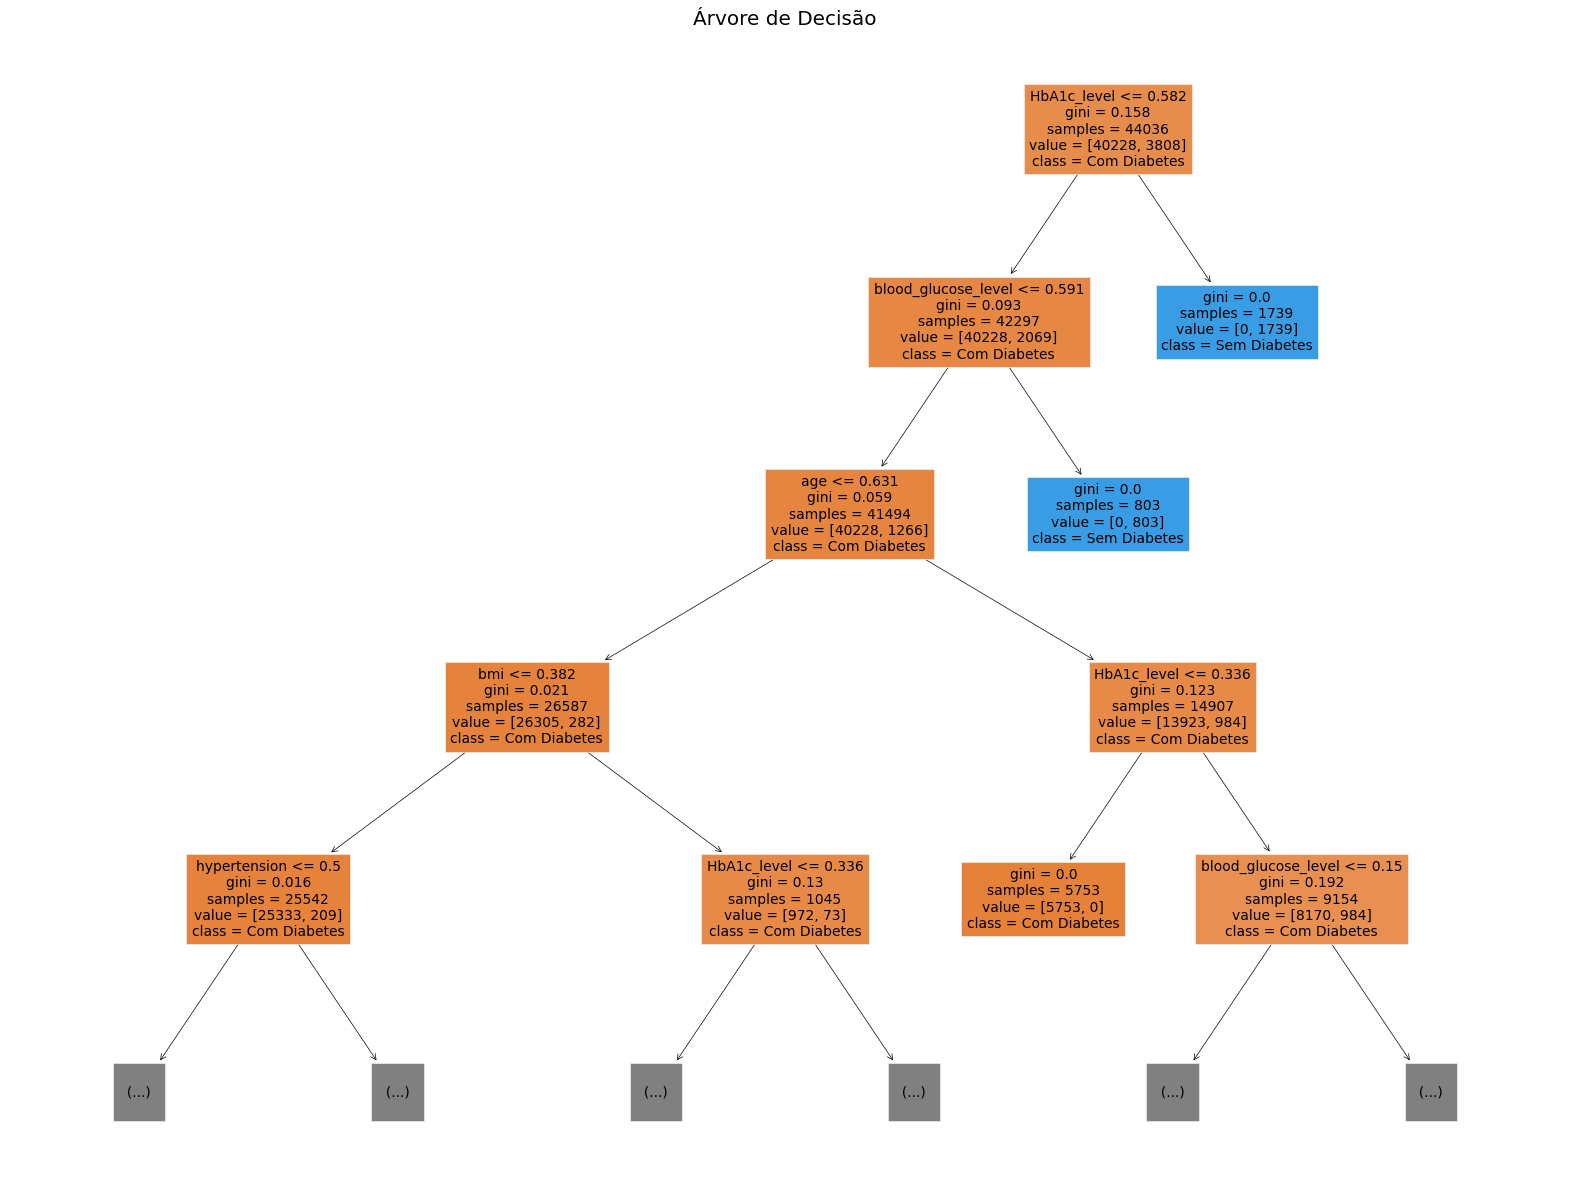

In [ ]:
from sklearn.tree import plot_tree
# Configurações para visualização da árvore
plt.figure(figsize=(20, 15))
plot_tree(arvore, filled=True, feature_names=X.columns, class_names=["Com Diabetes", "Sem Diabetes"], max_depth=4, fontsize=10)
plt.title("Árvore de Decisão")
plt.show()

# Regressão Logística

1. Resumo:

Utilizamos o modelo de Regressão Logística para identificar a probabilidade de incidência de diabetes em pacientes, baseando-nos em múltiplos indicadores clínicos. O modelo alcançou uma acurácia de aproximadamente 95.8%, destacando-se como uma ferramenta confiável para a classificação de indivíduos em risco.

2. Desempenho do Modelo:

Acurácia Geral: 95.8%
A acurácia, uma indicação da competência global do modelo, revela que cerca de 95.8% das classificações foram corretas, o que sublinha a confiabilidade do modelo em sua função.

Precisão:

Classe 0 (Não-diabetes): 96%
Classe 1 (Diabetes): 87%
A precisão do modelo foi alta tanto para os casos de não-diabetes (96%) quanto para diabetes (87%). Isso significa que a maioria das previsões de diabetes feitas pelo modelo foi verdadeira, minimizando a probabilidade de falsos positivos.

Recall (Sensibilidade):

Classe 0 (Não-diabetes): 99%
Classe 1 (Diabetes): 61%
O recall para a classe não-diabetes foi excelente (99%), indicando um sucesso notável na identificação de negativos verdadeiros. No entanto, o recall para a classe diabetes foi mais baixo (61%), apontando uma área onde o modelo pode estar perdendo casos positivos verdadeiros.

F1-Score:

Classe 0 (Não-diabetes): 98%
Classe 1 (Diabetes): 71%
O F1-Score equilibra precisão e recall. Aqui, vemos que o modelo manteve um desempenho robusto para a classe não-diabetes, mas mostrou espaço para melhoria nos casos de diabetes.

3. Matriz de Confusão:

A matriz de confusão forneceu os seguintes detalhes:

Verdadeiros positivos (Diabetes): 577
Falsos positivos (Classificados incorretamente como diabetes): 88
Verdadeiros negativos (Não-diabetes): 9969
Falsos negativos (Classificados incorretamente como não-diabetes): 375

In [ ]:
from sklearn.linear_model import LogisticRegression

# Dividindo os dados em características (X) e variável alvo (y)
X = dados1.drop('diabetes', axis=1)
y = dados1['diabetes']

# Dividindo os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinando o modelo de regressão logística
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
y_pred_logreg = log_reg.predict(X_teste)

# Avaliando a performance do modelo
acuracia_logreg = accuracy_score(y_teste, y_pred_logreg)
classification_rep_logreg = classification_report(y_teste, y_pred_logreg)
confusion_mat_logreg = confusion_matrix(y_teste, y_pred_logreg)

acuracia_logreg, classification_rep_logreg, confusion_mat_logreg

(0.9579435007720956,
 '              precision    recall  f1-score   support\n\n         0.0       0.96      0.99      0.98     10057\n         1.0       0.87      0.61      0.71       952\n\n    accuracy                           0.96     11009\n   macro avg       0.92      0.80      0.85     11009\nweighted avg       0.96      0.96      0.95     11009\n',
 array([[9969,   88],
        [ 375,  577]]))

95.80% de acurácia

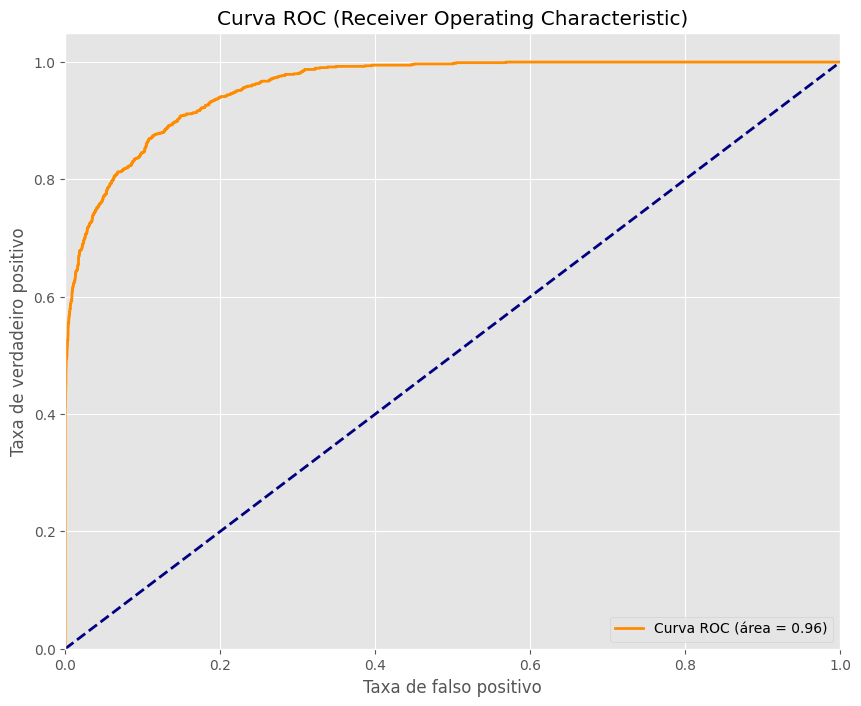

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculando as probabilidades previstas
y_prob = log_reg.predict_proba(X_teste)[:,1]

# Calculando a ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)

# Calculando a AUC
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()


Esta curva representa o desempenho do modelo de regressão logística em diferentes limiares. A área sob esta curva é de 0,96 (ou 96%), o que é um valor muito bom, indicando que o modelo tem uma capacidade de discriminação muito alta entre as classes.

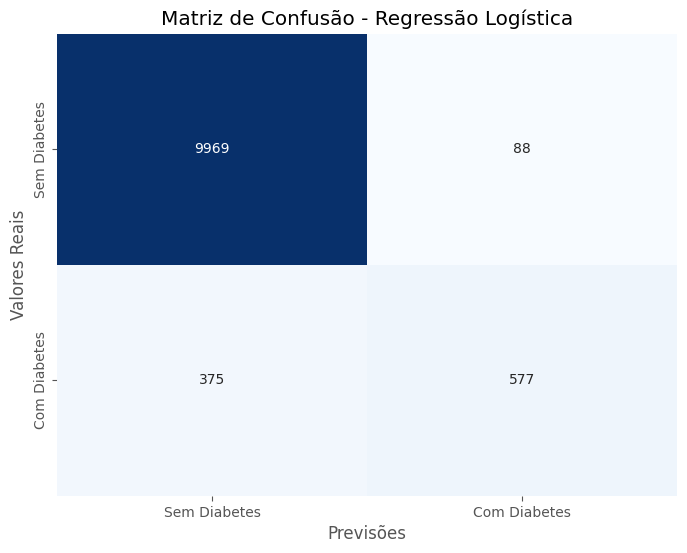

In [ ]:
# Visualizando a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_logreg, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'])
plt.yticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'], va='center')
plt.show()


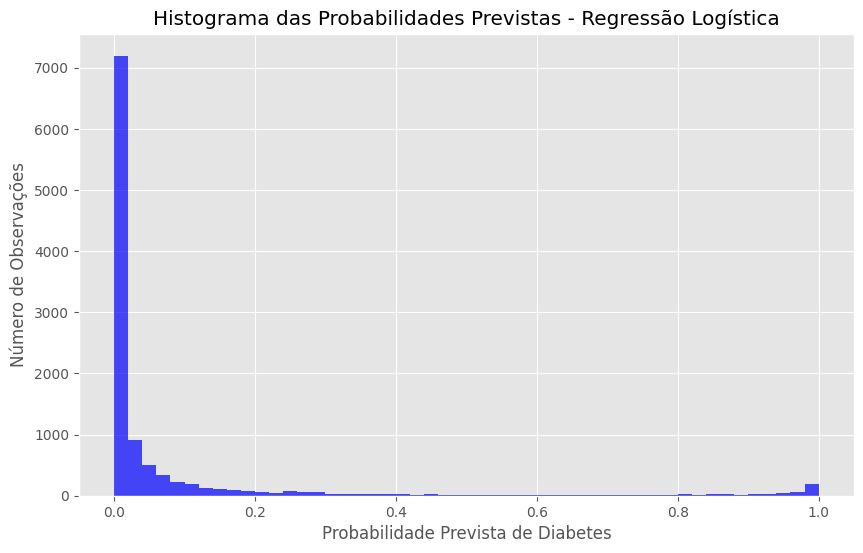

In [ ]:
# Probabilidades previstas para a classe positiva (Com Diabetes)
probs = log_reg.predict_proba(X_teste)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(probs, bins=50, color='blue', alpha=0.7)
plt.title('Histograma das Probabilidades Previstas - Regressão Logística')
plt.xlabel('Probabilidade Prevista de Diabetes')
plt.ylabel('Número de Observações')
plt.show()

# KNN

1. Resumo:

O modelo K-Nearest Neighbors (KNN) foi empregado para prever a ocorrência de diabetes em pacientes, com base em uma variedade de indicadores de saúde. O modelo foi bastante eficaz, com uma acurácia de aproximadamente 95.7%, indicando um alto grau de confiabilidade nas previsões.

O melhor valor de k encontrado foi de 7.

2. Desempenho do Modelo:

Acurácia Geral: 95.7%
A acurácia global do modelo sugere que ele é capaz de fazer previsões corretas em 95.7% dos casos, destacando sua utilidade como uma ferramenta de triagem preliminar.

Precisão:

Classe 0 (Não-diabetes): 96%
Classe 1 (Diabetes): 90%
A precisão reflete a proporção de identificações positivas que foram efetivamente corretas. Com 90% de precisão na previsão de casos de diabetes, o modelo demonstra uma habilidade robusta para discernir os casos de diabetes sem gerar um número excessivo de falsos positivos.

Recall (Sensibilidade):

Classe 0 (Não-diabetes): 99%
Classe 1 (Diabetes): 57%
O recall para não-diabetes é excepcional, mas a taxa de 57% para casos de diabetes indica que quase metade dos casos positivos reais pode não ser detectada, uma limitação importante do modelo atual.

F1-Score:

Classe 0 (Não-diabetes): 98%
Classe 1 (Diabetes): 70%
O F1-score ajuda a medir a precisão e o recall de forma equilibrada. Enquanto o modelo se sai muito bem em casos de não-diabetes, há uma queda significativa no desempenho com os casos de diabetes.

3. Matriz de Confusão:

Verdadeiros positivos (Diabetes): 543
Falsos positivos (Classificados incorretamente como diabetes): 63
Verdadeiros negativos (Não-diabetes): 9994
Falsos negativos (Classificados incorretamente como não-diabetes): 409

In [ ]:
# Descobrindo o melhor valor para k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

# Amostrando 20% dos dados para acelerar a validação cruzada
X_treino_sample, y_treino_sample = resample(X_treino, y_treino, replace=False, n_samples=int(0.2 * len(X_treino)), random_state=42)

# Lista de possíveis valores para k, testando a cada 3 valores
k_valores = list(range(1, 31, 3))

# Armazenar as médias das pontuações de validação cruzada para cada valor de k
k_medias_scores = []

# Executar validação cruzada para cada valor de k usando a amostra de dados
for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_treino_sample, y_treino_sample, cv=5, scoring='accuracy')
    k_medias_scores.append(scores.mean())

# Determinar o melhor valor de k
melhor_k = k_valores[k_medias_scores.index(max(k_medias_scores))]

print("Melhor valor de k:", melhor_k)
print("Acurácia de validação cruzada para o melhor k (na amostra):", max(k_medias_scores))



Melhor valor de k: 7
Acurácia de validação cruzada para o melhor k (na amostra): 0.9508340955279639


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treinar o KNN com k = 7 usando todo o conjunto de treinamento
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred_knn = knn.predict(X_teste)

# Avaliar o desempenho do modelo
acuracia_knn = accuracy_score(y_teste, y_pred_knn)
classification_rep_knn = classification_report(y_teste, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_teste, y_pred_knn)

acuracia_knn, classification_rep_knn, confusion_mat_knn


(0.9571259878281406,
 '              precision    recall  f1-score   support\n\n         0.0       0.96      0.99      0.98     10057\n         1.0       0.90      0.57      0.70       952\n\n    accuracy                           0.96     11009\n   macro avg       0.93      0.78      0.84     11009\nweighted avg       0.96      0.96      0.95     11009\n',
 array([[9994,   63],
        [ 409,  543]]))

95.71% de acurácia

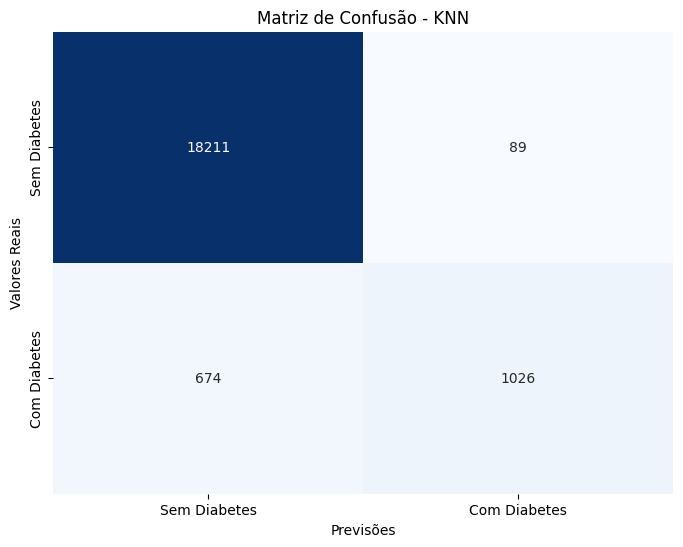

In [ ]:
# Matriz de Confusão para o KNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_knn, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - KNN')
plt.xticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'])
plt.yticks([0.5, 1.5], ['Sem Diabetes', 'Com Diabetes'], va='center')
plt.show()

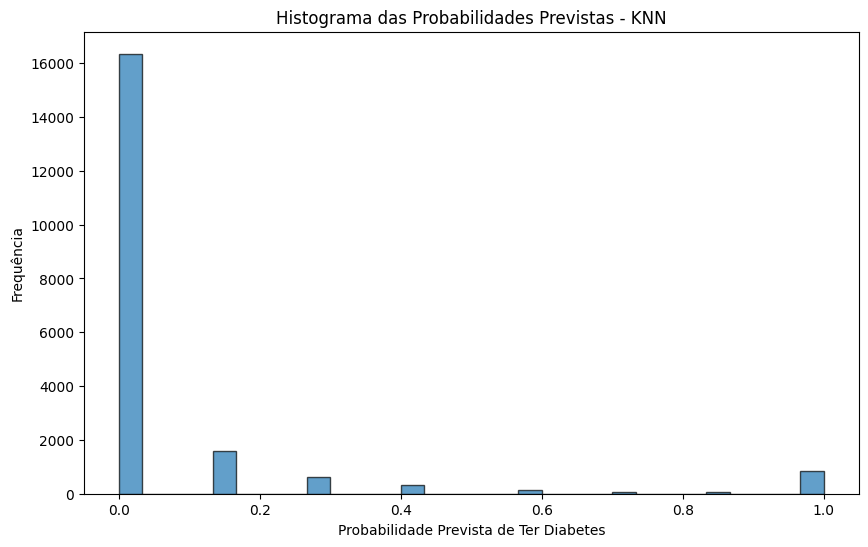

In [ ]:
# Obter as probabilidades previstas para a classe positiva (Com Diabetes)
y_probs_knn = knn.predict_proba(X_teste)[:, 1]

# Histograma das Probabilidades Previstas
plt.figure(figsize=(10, 6))
plt.hist(y_probs_knn, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma das Probabilidades Previstas - KNN')
plt.xlabel('Probabilidade Prevista de Ter Diabetes')
plt.ylabel('Frequência')
plt.show()


# Comparações

* Acurácia dos Modelos:

Este é um indicador geral de quão bem o nosso modelo acertou nas previsões, sejam elas positivas ou negativas.
Podemos ver que o KNN e a regressão logística apresentaram as melhores acurácias com 96%, seguido pela Árvore de Decisão com 0,95.
* Precisão dos Modelos:

Precisão nos diz o quão bem o modelo foi em prever positivamente casos de diabetes. Por exemplo, de todas as vezes que o modelo disse "Esta pessoa tem diabetes", quão frequente ele estava correto.
Neste aspecto, o KNN foi o vencedor com uma precisão de 0,90, seguido pela Regressão Logística com 0,87 e Árvore de Decisão com 0,70.
* Recall dos Modelos:

Recall nos dá uma ideia de quão bem o modelo foi em identificar todos os verdadeiros casos positivos de diabetes. Usando a nossa analogia, é como se quiséssemos saber quão bem o modelo "encontrou os diamantes".
Aqui, a Árvore de Decisão teve o maior recall de 0,71, empatado com a Regressão Logística, enquanto o KNN teve o recall mais baixo de 0,57.
* F1-Score dos Modelos:

O F1-Score é uma métrica que combina precisão e recall em um único número, buscando equilibrar os dois. É especialmente útil quando queremos uma visão geral da capacidade do modelo de acertar positivos verdadeiros (recall) sem errar muito nos falsos positivos (precisão).
Aqui, todos os três modelos têm F1-Scores bastante similares, variando entre 0,70 e 0,71.
Conclusão: Enquanto o KNN mostrou a maior acurácia e precisão, seu recall foi o mais baixo entre os três modelos. Isso significa que, embora ele possa ser muito bom em prever corretamente, ele pode estar perdendo alguns casos verdadeiros de diabetes. Por outro lado, a Árvore de Decisão e a Regressão Logística tiveram recall mais alto, mas sua precisão (especialmente da Árvore de Decisão) foi menor. Escolher o melhor modelo dependerá de quais métricas são mais importantes para o nosso objetivo final."

<Figure size 1200x800 with 0 Axes>

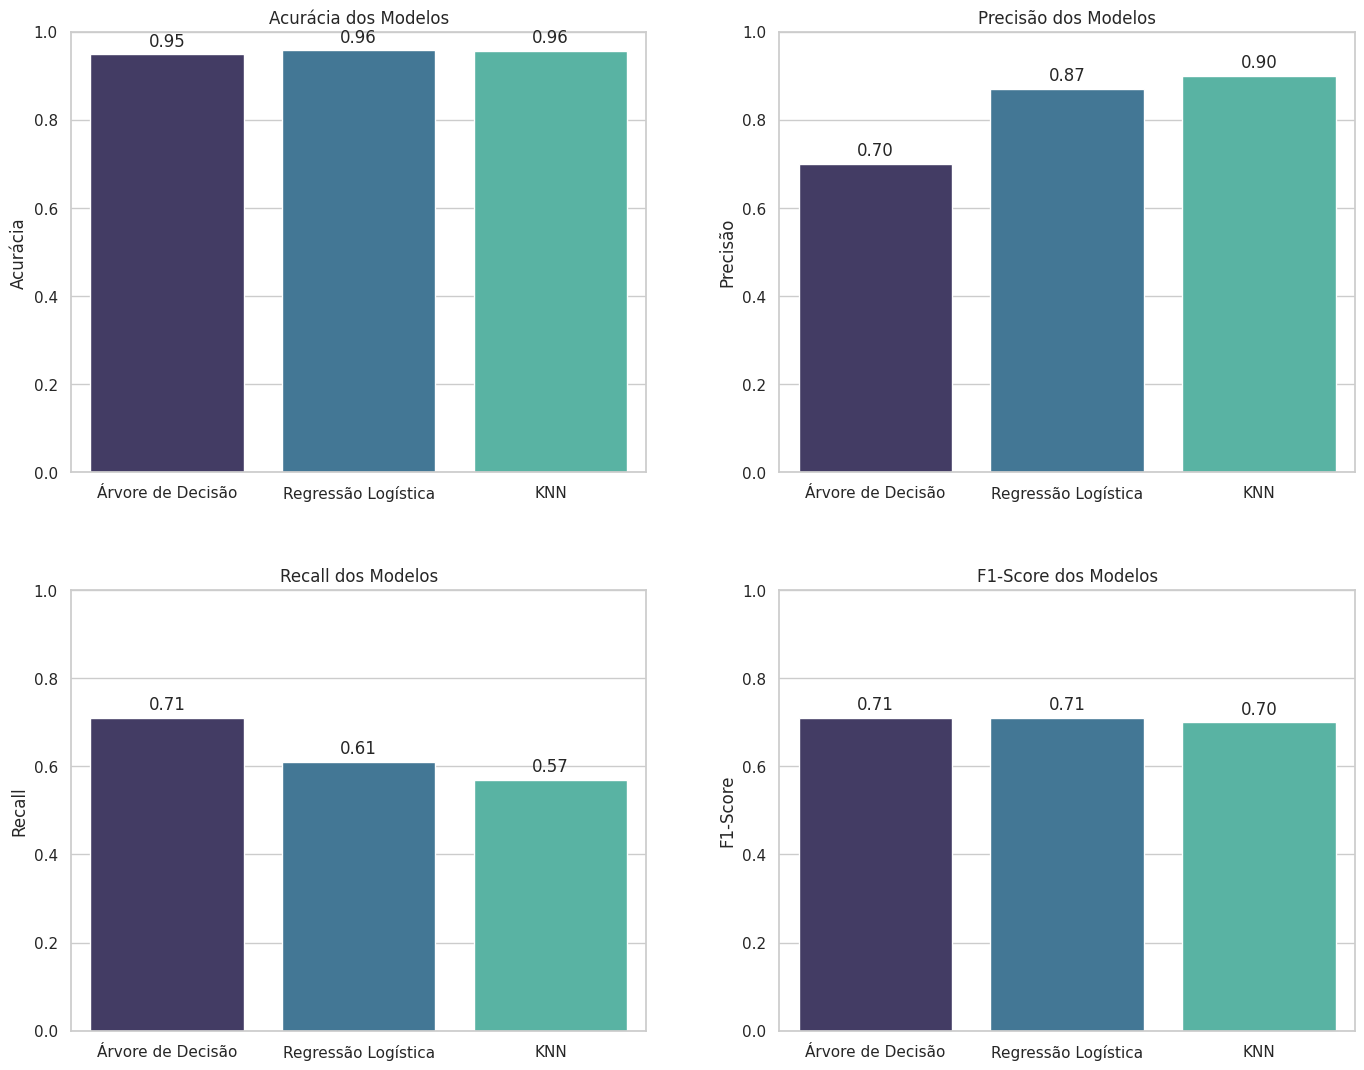

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definindo os dados
modelos = ['Árvore de Decisão', 'Regressão Logística', 'KNN']
acuracia = [0.9489, 0.9579, 0.9571]
precision = [0.70, 0.87, 0.90]
recall = [0.71, 0.61, 0.57]
f1_score = [0.71, 0.71, 0.70]

# Estilizando os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Definindo uma paleta de cores
cores = sns.color_palette("mako", 3)

# Criando subplots para ter gráficos lado a lado
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Ajustando o layout
plt.tight_layout(pad=5)

# Função para adicionar rótulos
def adicionar_rotulos(barras, ax):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plotando os gráficos
barras_acuracia = sns.barplot(x=modelos, y=acuracia, palette=cores, ax=ax[0, 0])
ax[0, 0].set_title('Acurácia dos Modelos')
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_yticks(np.arange(0, 1.1, 0.2))
ax[0, 0].set_ylabel('Acurácia')
adicionar_rotulos(barras_acuracia.patches, ax[0, 0])  o

barras_precisao = sns.barplot(x=modelos, y=precision, palette=cores, ax=ax[0, 1])
ax[0, 1].set_title('Precisão dos Modelos')
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_ylabel('Precisão')
adicionar_rotulos(barras_precisao.patches, ax[0, 1])

barras_recall = sns.barplot(x=modelos, y=recall, palette=cores, ax=ax[1, 0])
ax[1, 0].set_title('Recall dos Modelos')
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_ylabel('Recall')
adicionar_rotulos(barras_recall.patches, ax[1, 0])

barras_f1 = sns.barplot(x=modelos, y=f1_score, palette=cores, ax=ax[1, 1])
ax[1, 1].set_title('F1-Score dos Modelos')
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_ylabel('F1-Score')
adicionar_rotulos(barras_f1.patches, ax[1, 1])

plt.show()


# Testando os modelos

Para testar os modelos, criamos uma base de dados igual a original com dados
fictícios de 15 pacientes para servirem de teste. Os 5 primeiros pacientes, colocamos características de pessoas q tendem a ter diabetes, os outros 5 com características que tendem a não ter diabetes, e os últimos 5 com características aleatórias.

Vimos que o desempempenho dos modelos foi muito bom, uma vez que eles ficaram com previsões corretas e parecidas entre si.

In [ ]:
dados_teste = pd.read_csv("diabetes_prediction_test.csv")

display(dados_teste)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender,smoking_history
0,50,1,1,39.13,6.82,175.33,Male,never
1,55,1,0,31.75,6.50,168.88,Male,former
2,57,0,0,33.08,6.89,167.24,Female,current
3,62,1,1,34.93,6.61,172.52,Male,former
4,58,0,1,32.70,6.68,170.44,Male,never
5,26,0,0,19.84,4.71,72.93,Female,former
6,36,0,0,21.14,4.94,79.32,Female,never
7,36,0,0,22.55,4.28,80.06,Male,never
8,32,0,0,20.46,4.75,94.26,Male,never
9,35,0,0,21.08,4.43,86.87,Female,current


In [ ]:
# Aplicando One-Hot Encoding nas colunas gender e smoking_history
if 'gender' in dados_teste.columns and 'smoking_history' in dados_teste.columns:
    dados_teste = pd.get_dummies(dados_teste, columns=['gender', 'smoking_history'], drop_first=True)

# Normalizando os dados com o mesmo scaler usado para os dados de treinamento
colunas_para_normalizar = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']  # as mesmas colunas que foram normalizadas nos dados de treino


dados_teste[colunas_para_normalizar] = scaler.transform(dados_teste[colunas_para_normalizar])


# Identificando colunas faltantes
colunas_faltantes = set(dados1.columns) - set(dados_teste.columns)

# Adicionando colunas faltantes com valores 0
for coluna in colunas_faltantes:
    dados_teste[coluna] = 0

# Certificando-se de que as colunas estão na mesma ordem que os dados de treinamento
dados_teste = dados_teste[dados1.columns]

# Removendo a coluna 'diabetes' se estiver presente, pois queremos prever isso
dados_teste = dados_teste.drop(columns=['diabetes'], errors='ignore')


In [ ]:
modelos = [arvore, log_reg, knn]

# Definir um dicionário para armazenar as previsões
previsoes = {}

# Fazendo as previsões
for modelo_nome, modelo in zip(['Árvore de Decisão', 'Regressão Logística', 'KNN'], modelos):
    previsoes[modelo_nome] = modelo.predict(dados_teste)  # Substitua 'dados_teste_processados' pelo nome correto do seu DataFrame de teste processado

for modelo, previsao in previsoes.items():
    print(f"Previsões do modelo {modelo}:")
    print(previsao)



Previsões do modelo Árvore de Decisão:
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Previsões do modelo Regressão Logística:
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
Previsões do modelo KNN:
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Podemos ver que os 3 modelos acertaram nas 5 primeiras previsões, que a forçamos os dados para darem positivo, e nas outras 5, que forçamos para dar negativo. Além disso, os últimos 5, que eram aleatórios, ficaram bem semelhantes entre si.

# Análise de dados das principais variáveis
Aqui vemos a relação entre a diabete e as principais variáveis.

* Hb1Ac: Representando o nível de açúcar no sangue, podemos ver que os pacientes com níveis mais elevados tendem a ter diabetes.

* Glicose: Vemos também que os pacientes com níveis de glicose mais elevados no sangue tendem a ter diabetes

* IMC: A maioiria está entre o 20 e 40, com os pacientes com IMC mais elevados tendendo a ter diabetes, porém temos vários outliers indicando que pacientes com IMC elevado também podem ou não ter diabetes.

* Idade: Vemos que pacientes mais velhos tendem mais a ter diabetes, porém tem vários outliers indicando que pacientes mais jovens também podem ter.

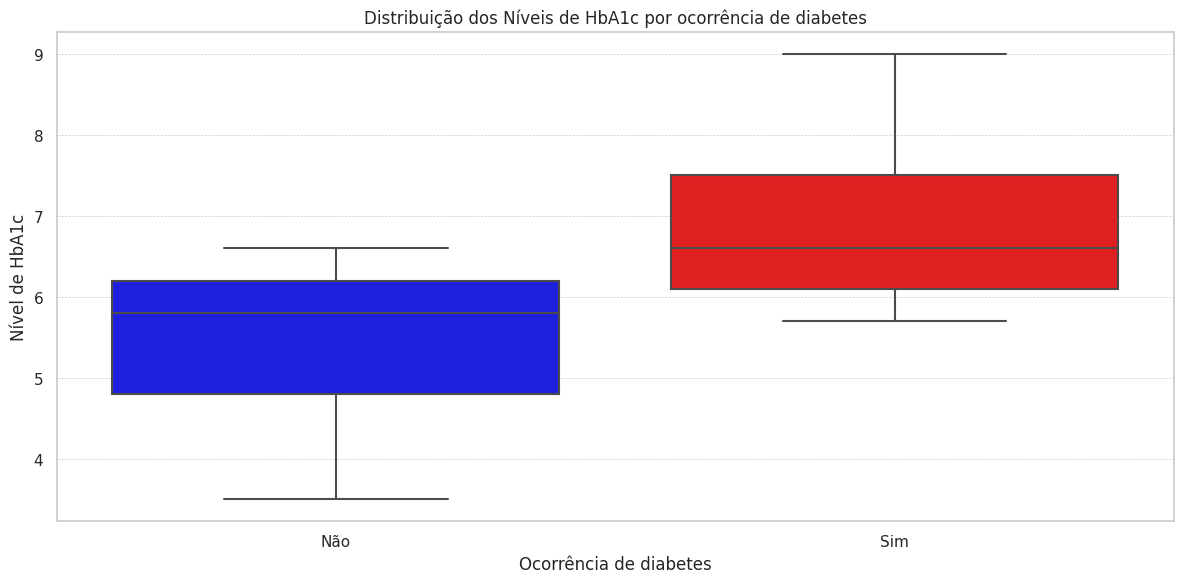

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dados['diabetes'].replace({0: 'Não', 1: 'Sim'}), y=dados['HbA1c_level'], palette=['blue', 'red'])
plt.title('Distribuição dos Níveis de HbA1c por ocorrência de diabetes')
plt.xlabel('Ocorrência de diabetes')
plt.ylabel('Nível de HbA1c')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

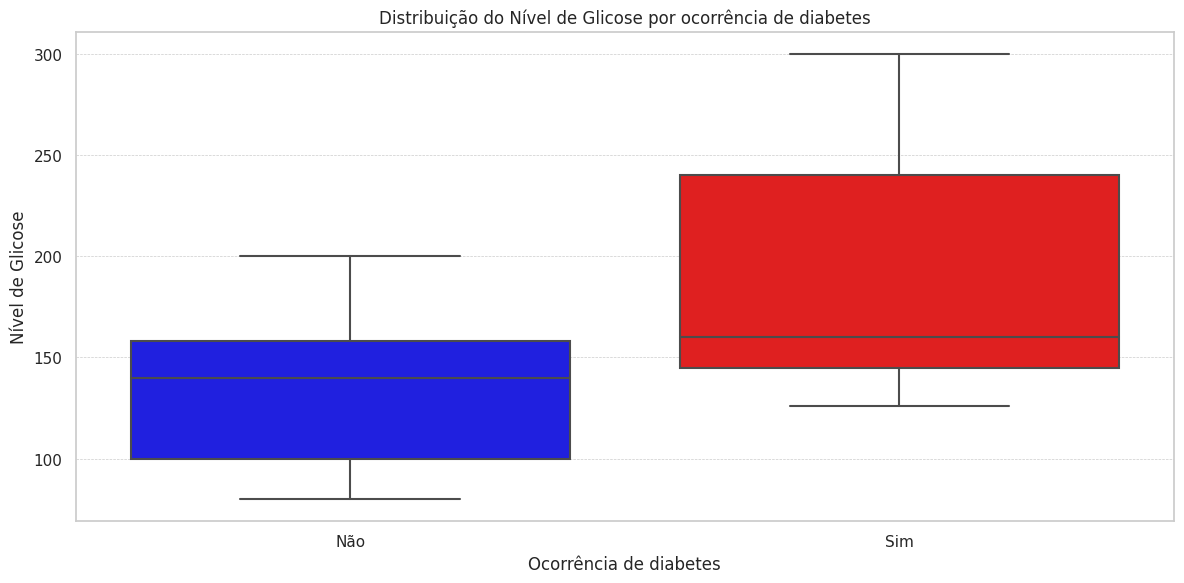

In [ ]:

# Supondo que seus dados estão no DataFrame chamado "dados"
plt.figure(figsize=(12, 6))
sns.boxplot(x=dados['diabetes'].replace({0: 'Não', 1: 'Sim'}), y=dados['blood_glucose_level'], palette=['blue', 'red'])
plt.title('Distribuição do Nível de Glicose por ocorrência de diabetes')
plt.xlabel('Ocorrência de diabetes')
plt.ylabel('Nível de Glicose')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


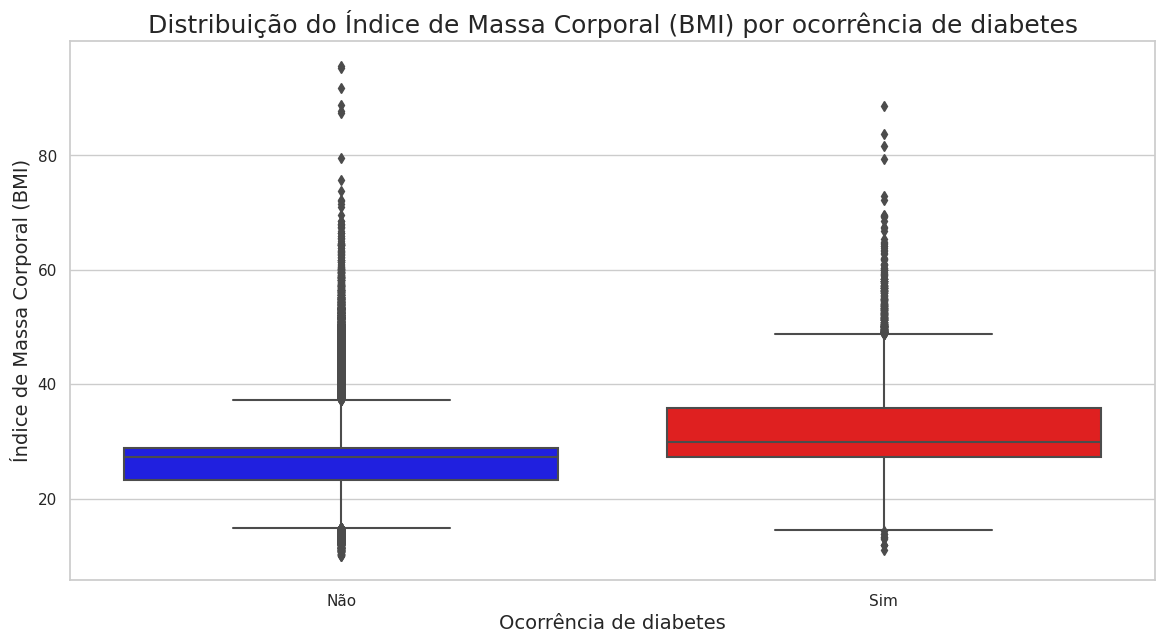

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo do Seaborn
sns.set_style("whitegrid")

# Criando o gráfico de boxplot
plt.figure(figsize=(14, 7))

# Criando boxplot
sns.boxplot(x=dados['diabetes'], y=dados['bmi'], palette={0: 'blue', 1: 'red'})

# Adicionar título e descrição dos eixos
plt.title('Distribuição do Índice de Massa Corporal (BMI) por ocorrência de diabetes', fontsize=18)
plt.xlabel('Ocorrência de diabetes', fontsize=14)
plt.ylabel('Índice de Massa Corporal (BMI)', fontsize=14)

# Ajustando o eixo X para mostrar "Não" e "Sim"
plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()


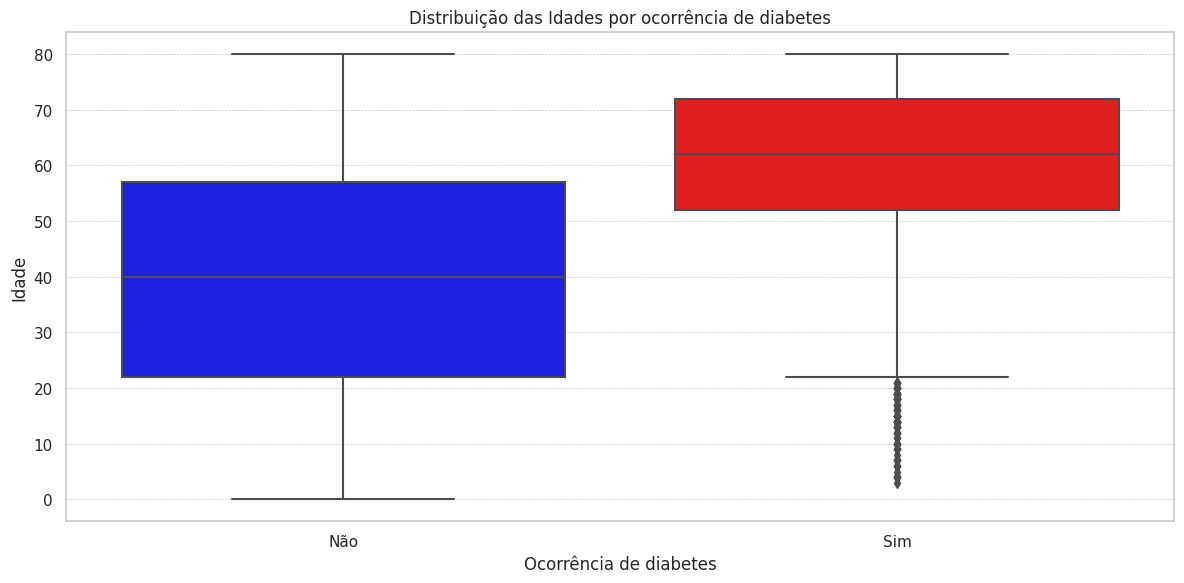

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dados['diabetes'].replace({0: 'Não', 1: 'Sim'}), y=dados['age'], palette=['blue', 'red'])
plt.title('Distribuição das Idades por ocorrência de diabetes')
plt.xlabel('Ocorrência de diabetes')
plt.ylabel('Idade')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Conclusões
Comparação de Desempenho:

A Regressão Logística e o KNN mostraram desempenhos semelhantes em termos de acurácia, ambos em torno de 95.7% - 95.8%. No entanto, a Regressão Logística apresentou uma precisão ligeiramente superior na identificação de casos verdadeiros de diabetes (87% contra 90% do KNN).
A Árvore de Decisão apresentou um bom equilíbrio geral entre precisão e recall, com uma acurácia de 94.9%. Apesar de sua menor acurácia em comparação com os outros modelos, ela demonstrou uma habilidade consistente de identificar corretamente os casos negativos e positivos.

Enquanto o modelo de Regressão Logística teve um desempenho ligeiramente superior em termos de precisão, seu recall para a classe positiva (diabetes) foi consideravelmente mais baixo comparado com a Árvore de Decisão. Isso sugere que a Regressão Logística, embora precise, pode estar perdendo um número significativo de casos positivos verdadeiros (diabetes).
O KNN, embora preciso, também sofreu com um recall mais baixo, indicando que ele pode não ser o modelo mais confiável para identificar todos os casos positivos verdadeiros.

A Árvore de Decisão oferece a vantagem da interpretabilidade, sendo fácil de entender e comunicar a lógica por trás das decisões do modelo. Isso pode ser particularmente útil em um contexto clínico, onde a compreensão do raciocínio do modelo é crucial.


Riscos de Falsos Negativos:

Em um cenário médico ou de saúde, falsos negativos (não identificar um caso de diabetes quando o indivíduo tem a condição) podem ter consequências sérias. Portanto, um modelo com um recall mais alto para a classe positiva pode ser preferível, mesmo que isso signifique uma redução na precisão.


Portanto, com base nas análises dos modelos, para a previsão de diabetes, a árvore de decisão poderia ser a melhor opção, apesar da acurácia um pouco menor. A capacidade deste modelo de fornecer resultados mais equilibrados, sua interpretabilidade e seu maior recall para casos de diabetes (essencial para minimizar falsos negativos) são vantagens significativas no contexto de previsões médicas. No entanto, a escolha final do modelo deve também levar em conta o contexto específico de aplicação. Se for aceitável ter alguns falsos negativos em favor de reduzir falsos positivos (por questões de custo, por exemplo), a Regressão Logística ou o KNN poderiam ser preferíveis.